In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
df=pd.read_csv("Bank_note.csv")

In [6]:
df

,V1,V2,V3,V4,Class
0,3.62160,8.66610,-2.8073,-0.44699,1
1,4.54590,8.16740,-2.4586,-1.46210,1
2,3.86600,-2.63830,1.9242,0.10645,1
3,3.45660,9.52280,-4.0112,-3.59440,1
4,0.32924,-4.45520,4.5718,-0.98880,1
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,2
1368,-1.38870,-4.87730,6.4774,0.34179,2
1369,-3.75030,-13.45860,17.5932,-2.77710,2
1370,-3.56370,-8.38270,12.3930,-1.28230,2


### Attribute Information

    V1. variance of Wavelet Transformed image (continuous)
    V2. skewness of Wavelet Transformed image (continuous)
    V3. curtosis of Wavelet Transformed image (continuous)
    V4. entropy of image (continuous)

    Class (target). Presumably 1 for genuine and 2 for forged

In [7]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'Class'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1372 non-null   float64
 1   V2      1372 non-null   float64
 2   V3      1372 non-null   float64
 3   V4      1372 non-null   float64
 4   Class   1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [9]:
df.isnull().sum()

V1       0
V2       0
V3       0
V4       0
Class    0
dtype: int64

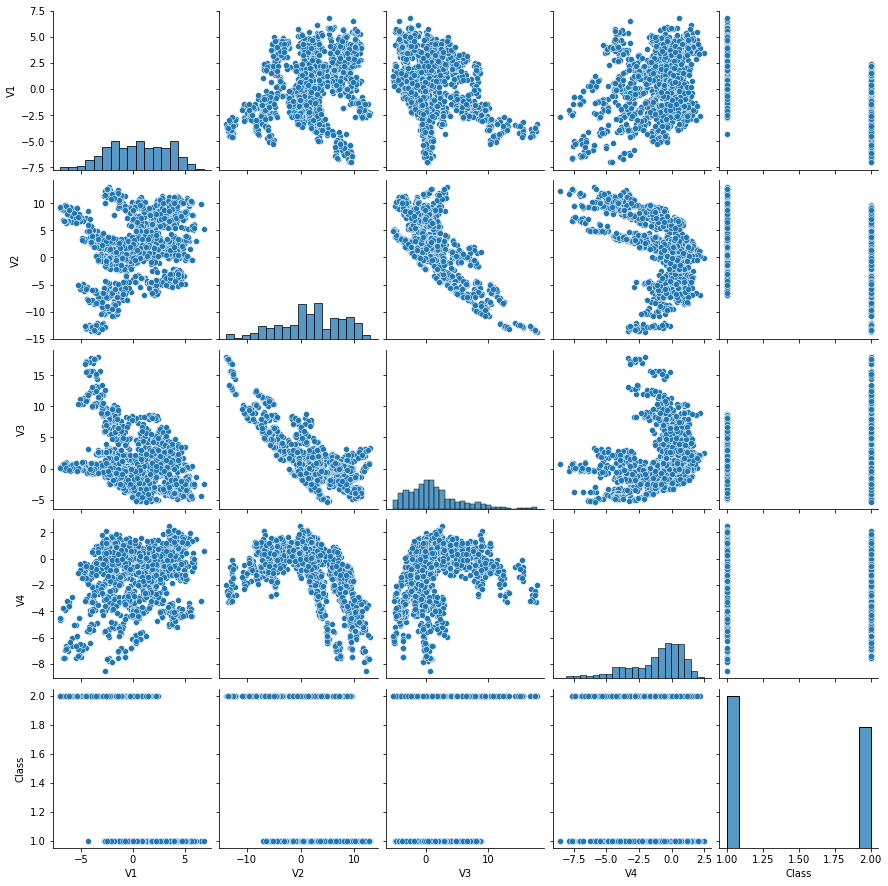

In [10]:

sns.pairplot(df)

<AxesSubplot:>

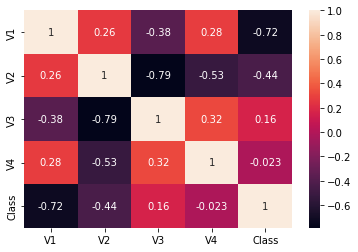

In [11]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:>

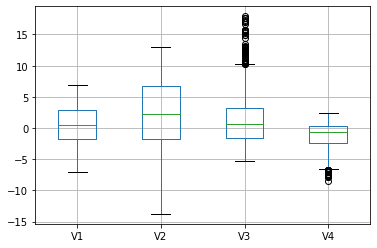

In [12]:
df.boxplot(column=['V1','V2','V3','V4'])

In [13]:
# many outliers in v3 and v4
median = df.loc[df['V3']<10, 'V3'].median()
df['V3']=df['V3'].mask(df['V3']>10, median)


median = df.loc[df['V4']>-6, 'V4'].median()
df['V4']=df['V4'].mask(df['V4']<-6, median)

<AxesSubplot:>

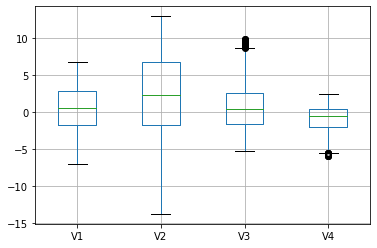

In [14]:
df.boxplot(column=['V1','V2','V3','V4'])

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X= df.drop(["Class"], axis=1)
y=df['Class']

In [17]:
X_train,X_test, y_train, y_test= train_test_split(X,y, test_size=0.12, random_state=42)

X_train.shape

(1207, 4)

## Algorithms being used:
    1. Decision Tree
    2. Logistic Regression
    3. KNN
    4. Random Forest

# 1. Decision tree

In [18]:
X_train,X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

X_train.shape

(1097, 4)

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, accuracy_score
from sklearn.tree import plot_tree

In [20]:
model=DecisionTreeClassifier()

In [21]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
y_pred=model.predict(X_test)

In [23]:
confusion_matrix(y_test, y_pred)

array([[147,   1],
       [  5, 122]], dtype=int64)

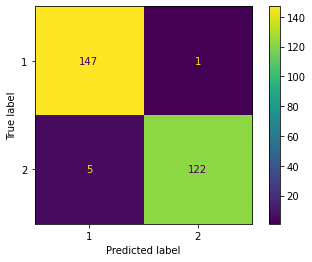

In [24]:
plot_confusion_matrix(model, X_test, y_test)

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.97      0.99      0.98       148
           2       0.99      0.96      0.98       127

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



In [26]:
accuracy_score(y_test, y_pred)

0.9781818181818182

In [27]:
pd.DataFrame(data=model.feature_importances_, index= X.columns, columns=['feature importance'])

,feature importance
V1,0.624162
V2,0.218562
V3,0.141150
V4,0.016126


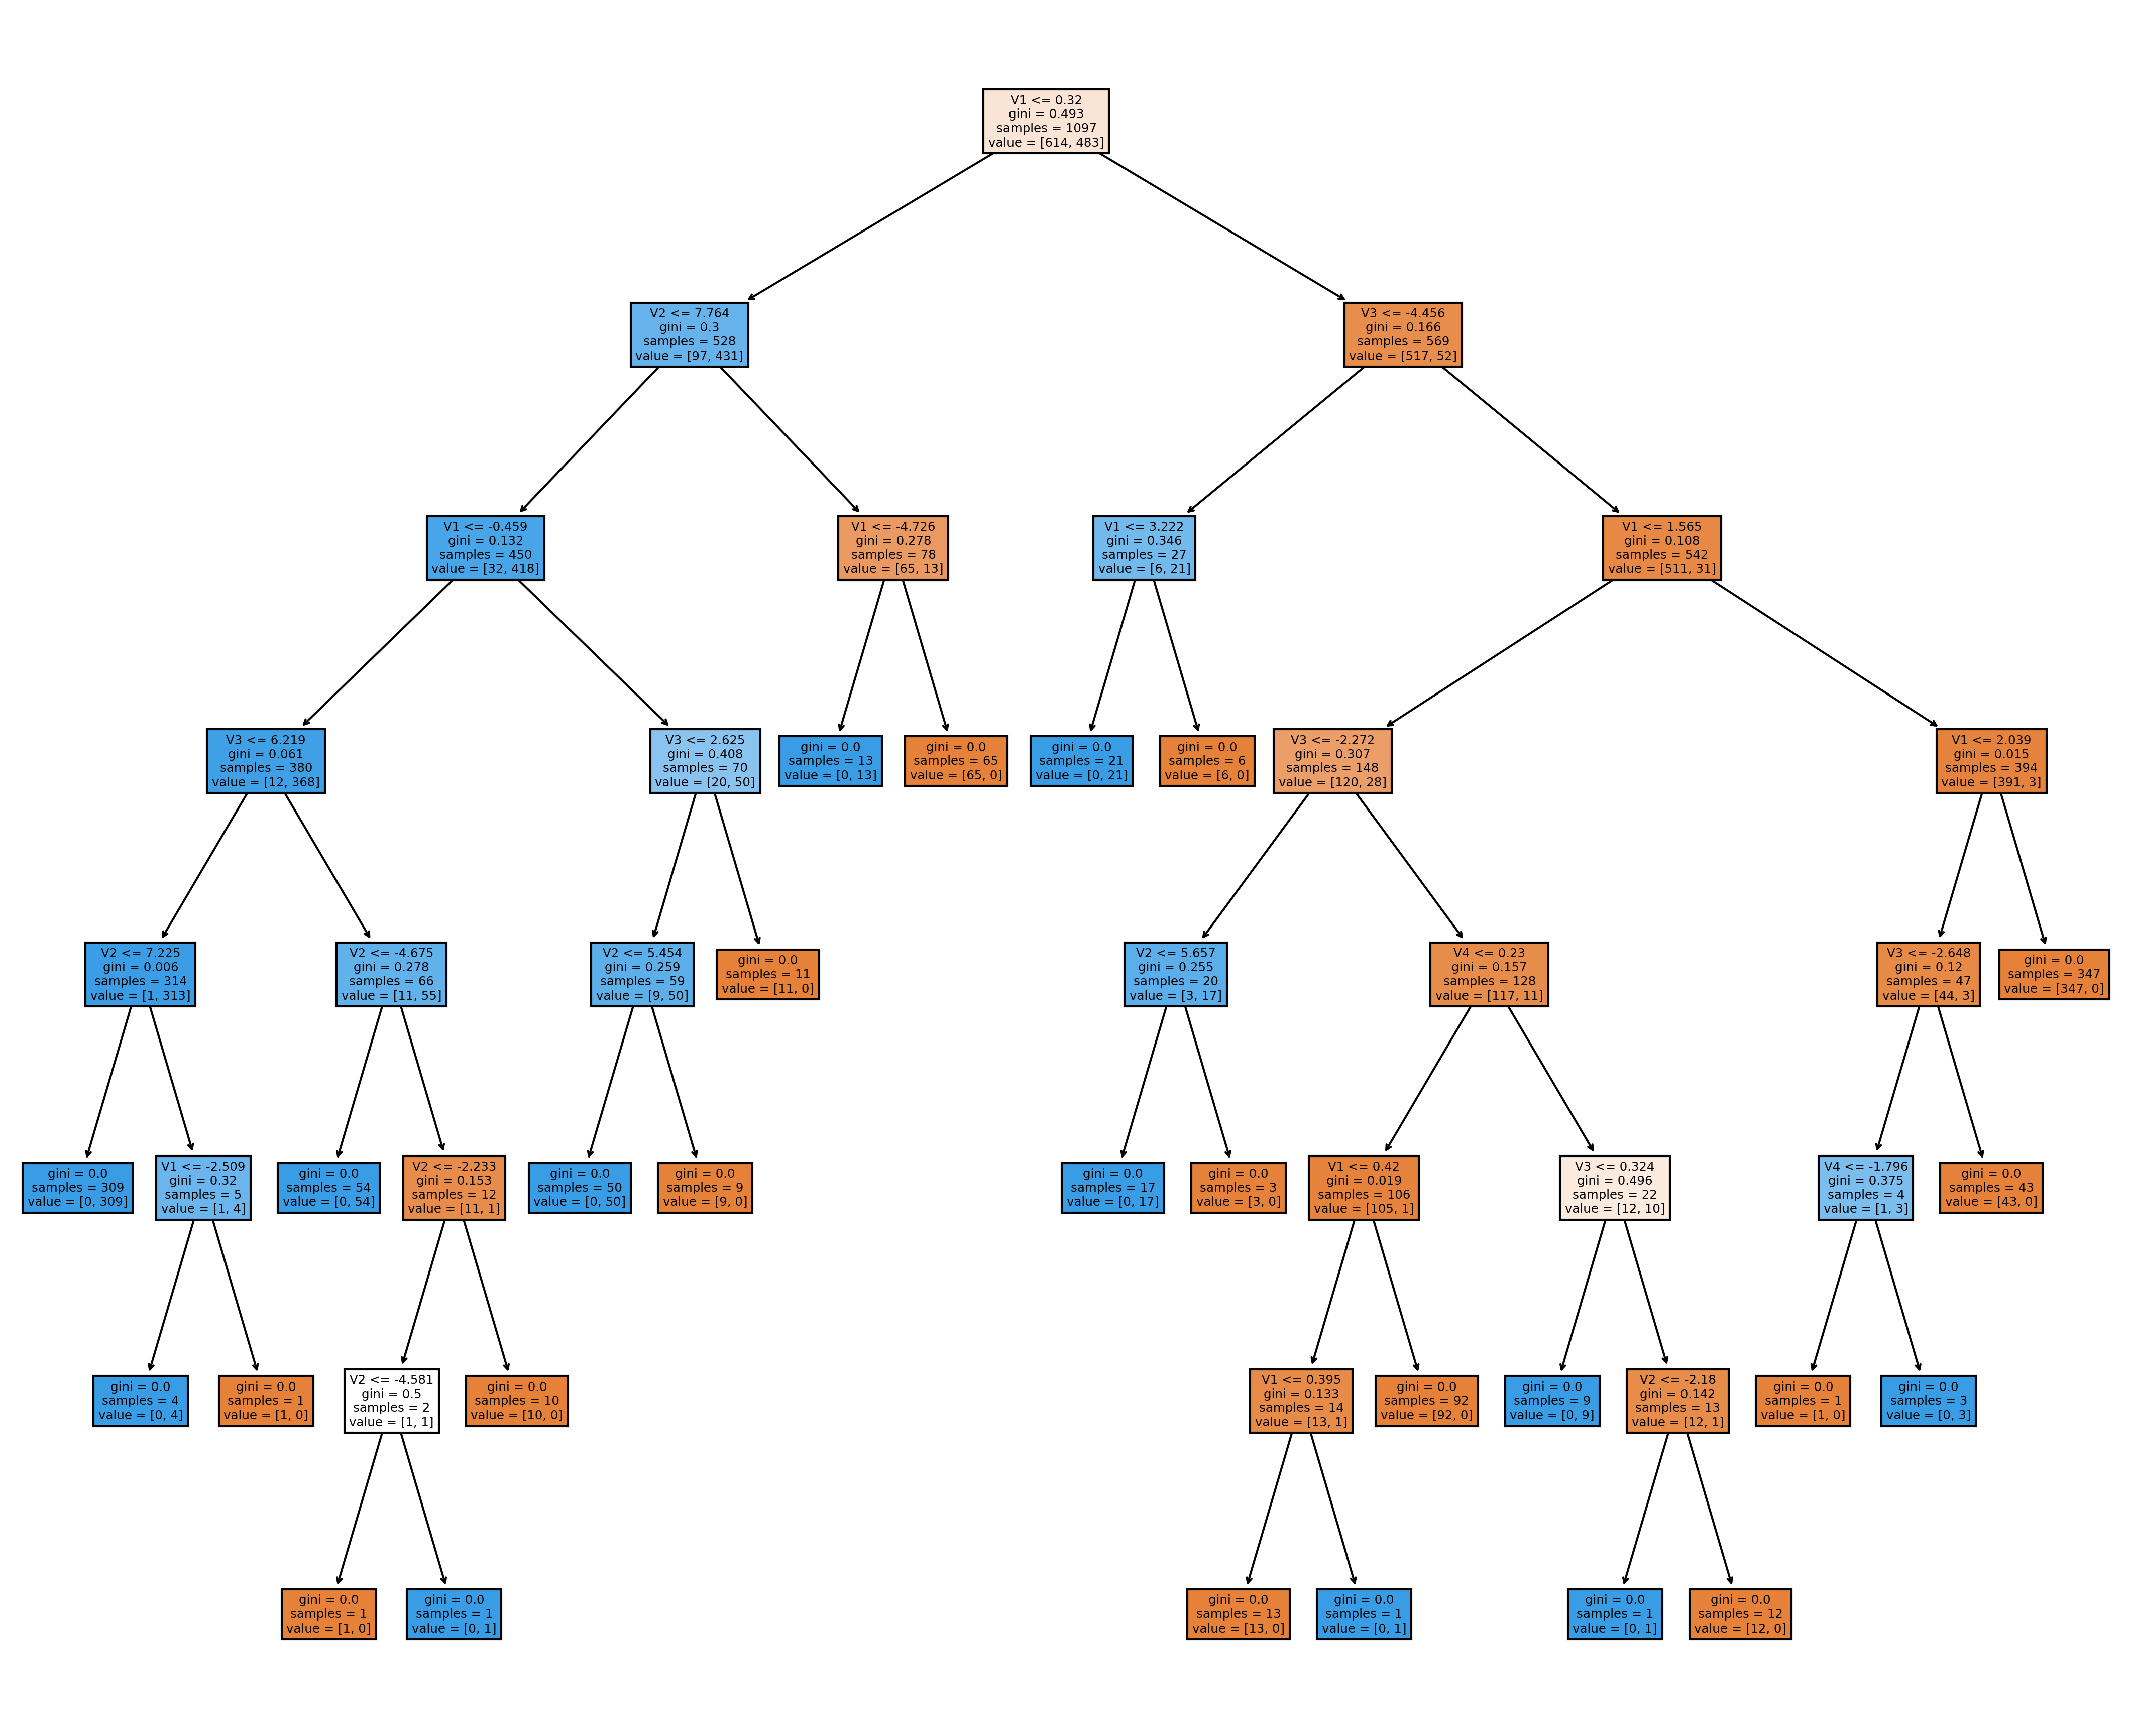

In [28]:
plt.figure(figsize=(18,15), dpi=300)
plot_tree(model, feature_names= X.columns, filled=True);


In [29]:
# Applying Parameter hypertuning

from scipy.stats import randint
from sklearn.model_selection import GridSearchCV

In [30]:
params={'max_depth': [3,4,5,6],
               
                "max_features":["auto","log2","sqrt",None], 
                'max_leaf_nodes': [None, 5,10,13,14]}

In [31]:
grid_model = GridSearchCV(estimator =model, param_grid=params, cv =5)

In [32]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 5, 10, 13, 14]})

In [33]:
grid_model.best_params_


{'max_depth': 6, 'max_features': None, 'max_leaf_nodes': None}

In [34]:
grid_model.best_score_

0.9808592777085927

In [35]:
# testing
Grid_Model= DecisionTreeClassifier( max_depth= 6,max_features= None,max_leaf_nodes= None)
Grid_Model.fit(X_train, y_train)

Grid_model_predict= Grid_Model.predict(X_test)

accuracy_score(y_test, Grid_model_predict)

0.9709090909090909

# 2. Logistic Regression

In [36]:
X_train,X_test, y_train, y_test= train_test_split(X,y, test_size=0.12, random_state=42)


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix

In [38]:
lr=LogisticRegression()
st=StandardScaler()

In [39]:
X_train=st.fit_transform(X_train)
X_test= st.transform(X_test)

In [40]:
lr.fit(X_train, y_train)

LogisticRegression()

In [41]:
pred=lr.predict(X_test)

In [42]:
target=['Class']

In [43]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       1.00      0.98      0.99        88
           2       0.97      1.00      0.99        77

    accuracy                           0.99       165
   macro avg       0.99      0.99      0.99       165
weighted avg       0.99      0.99      0.99       165



In [44]:
accuracy_score(y_test, pred)

0.9878787878787879

In [45]:
confusion_matrix(y_test,pred)

array([[86,  2],
       [ 0, 77]], dtype=int64)

In [46]:
## Grid Search CV

c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
logreg_cv = GridSearchCV(lr, param_grid, cv = 5)
logreg_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])})

In [47]:
logreg_cv.best_params_

{'C': 31.622776601683793}

In [48]:
logreg_cv.best_score_

0.9958609101196803

# 3. KNN

In [49]:
X_train,X_test, y_train, y_test= train_test_split(X,y, test_size=0.12, random_state=42)

X_train.shape

(1207, 4)

In [103]:
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
from mlxtend.plotting import plot_decision_regions

In [104]:
model=KNeighborsClassifier()

In [105]:
X_train=st.fit_transform(X_train)
X_test=st.transform(X_test)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [106]:
y_pred= model.predict(X_test)

In [107]:
confusion_matrix(y_test, y_pred)

array([[88,  0],
       [ 0, 77]], dtype=int64)

In [108]:
accuracy_score(y_test, y_pred)

1.0

In [110]:
params={"n_neighbors":[3,4,5,6,7,8,9,10], 'metric':['minkowski', 'eucledian','manhattan'], 'weights':['uniform',"distance" ]  }

In [57]:
GridSearch= GridSearchCV(estimator=model, param_grid= params, cv=5)

In [58]:
gs_model= GridSearch.fit(X_train, y_train)

In [59]:
gs_model.best_params_

{'metric': 'minkowski', 'n_neighbors': 3, 'weights': 'uniform'}

In [60]:
gs_model.best_score_

0.9983436782003361

# 4. Random Forests

In [61]:
X_train,X_test, y_train, y_test= train_test_split(X,y, test_size=0.12, random_state=42)
from sklearn.ensemble import RandomForestClassifier

In [62]:
rf=RandomForestClassifier(n_estimators=100, max_features='auto', random_state=42,criterion="entropy")

In [63]:
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [64]:
y_pred= rf.predict(X_test)


In [65]:
rf.feature_importances_

array([0.5307895 , 0.24719043, 0.17245114, 0.04956893])

In [66]:
confusion_matrix(y_test, y_pred)

array([[88,  0],
       [ 1, 76]], dtype=int64)

In [67]:
from sklearn.tree import export_graphviz

In [68]:
accuracy_score(y_test, y_pred)

0.9939393939393939

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.99      1.00      0.99        88
           2       1.00      0.99      0.99        77

    accuracy                           0.99       165
   macro avg       0.99      0.99      0.99       165
weighted avg       0.99      0.99      0.99       165



In [70]:
params={ 'n_estimators':[10,40,50,100,110], 'max_features':  ["auto", "sqrt", "log2"], "max_depth": [4,5,6,7,8,9], "max_leaf_nodes": [6,8,5,2,10]}

Grid_Search = GridSearchCV(estimator=rf, param_grid=params, cv=5)

In [71]:
Grid_model= Grid_Search.fit(X_train, y_train)

In [72]:
Grid_model.best_params_

{'max_depth': 6,
 'max_features': 'auto',
 'max_leaf_nodes': 10,
 'n_estimators': 40}

In [73]:
Grid_model.best_score_

0.9900620692020163

In [76]:
# testing

Grid_search_rf= RandomForestClassifier(max_features="auto", n_estimators=100, max_depth =6 , max_leaf_nodes= 10)


In [77]:
grid_search=Grid_search_rf.fit(X_train, y_train)

In [79]:
y_pred= grid_search.predict(X_test)

In [80]:
accuracy_score(y_test, y_pred)

0.9818181818181818

## SVM

In [81]:
X_train,X_test, y_train, y_test= train_test_split(X,y, test_size=0.12, random_state=42)

In [82]:
from sklearn.svm import SVC

In [84]:
clf=SVC()

In [85]:
clf.fit(X_train, y_train)

SVC()

In [86]:
y_pred=clf.predict(X_test)

In [87]:
accuracy_score(y_test, y_pred)

1.0

In [91]:
params={ "kernel" : ['linear', 'poly', 'rbf', 'sigmoid'], "gamma" : ['scale', 'auto']}

In [92]:
Grid_Search=GridSearchCV(estimator=clf, param_grid=params, cv=5)

In [93]:
grid_search= Grid_Search.fit(X_train, y_train)

In [94]:
y_pred=grid_search.predict(X_test)

In [95]:
accuracy_score(y_test, y_pred)

1.0